##Facial Age Recognition:
The main aim of the project is to classify the given image into a particular age category. Google colab GPU is used to train the models. To begin with, the data was trained using conebvntional machine learning models and findings were reported. In addition to that, deep learning models were used to train the dataset. Finally comparision between conventional and deep learning models was reported at the end of the notebook




Import and drive mount

In [2]:
import numpy as np
from os.path import join
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from google.colab import drive

drive.mount('/content/drive/')


Mounted at /content/drive/


Variable and label definition

In [3]:
image_size = 100
dataset_directory = '/content/drive/My Drive/comp8220'  # change to your own directory

age_ranges = {
    (6,20) : 0, 
    (35,40) : 1, 
    (55,98) : 2
}

def convert_ranges(age):
  for key in age_ranges:
    if key[0] <= age <= key[1]:
      return age_ranges[key]


def transform_labels_age(labels_vec):
  new_labels_vec = []
  for x in labels_vec:
    x2 = x.split('-')
    new_labels_vec.append(convert_ranges(int(x2[1])))
  return np.array(new_labels_vec)

def transform_labels(labels_vec):
  return transform_labels_age(labels_vec)


Data loading and rescaling

In [4]:
images_train = np.load(join(dataset_directory, 'train_images.npy'))
labels_train_full = np.load(join(dataset_directory, 'train_labels.npy'))
labels_train = transform_labels(labels_train_full)

images_val = np.load(join(dataset_directory, 'val_images.npy'))
labels_val_full = np.load(join(dataset_directory, 'val_labels.npy'))
labels_val = transform_labels(labels_val_full)

images_test_public = np.load(join(dataset_directory, 'test_images.npy'))
images_test_priv = np.load(join(dataset_directory, 'test_priv_images.npy'))
images_train = images_train.reshape([-1, image_size,image_size,3]) / 255.0
images_val = images_val.reshape([-1, image_size,image_size,3]) / 255.0
images_test_public = images_test_public.reshape([-1, image_size,image_size,3]) / 255.0
images_test_priv = images_test_priv.reshape([-1, image_size,image_size,3]) / 255.0

print(images_train.shape)
print(images_val.shape)
print(images_test_public.shape)
print(images_test_priv.shape)
print(labels_val_full[:9])
print(labels_val[:9])


(13475, 100, 100, 3)
(2595, 100, 100, 3)
(2374, 100, 100, 3)
(2122, 100, 100, 3)
['12626-16' '12726-37' '12726-37' '12726-37' '12726-37' '12726-37'
 '12726-37' '12726-39' '12726-37']
[0 1 1 1 1 1 1 1 1]


Converting the 3 dimensional array to one dimensional array in order to fit conventional machine learning models using reshape function.

In [5]:
images_train_flatten = images_train.reshape([-1, image_size*image_size*3])
images_val_flatten = images_val.reshape([-1, image_size*image_size*3])
images_test_public_flatten = images_test_public.reshape([-1, image_size*image_size*3])

In [6]:
images_train_flatten.shape

(13475, 30000)

# Conventional Machine Learning:

Since, the training dataset contains more variables than observations training the model, training the model on such dataset might overfit the model and is computationally expensive.
One of solutions to solve the above problem is to use dimensionality reduction techniques for converting higher dimensioanl dataset to lower dimensional dataset by retaining the most relevant properties of the data.
In this assignment Principal Component Analysis from scikt learn is used to reduce the dimension by passing the number of components, which is assumed to be 100.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 100)
pca_train = pca.fit_transform(images_train_flatten)
pca_val = pca.transform(images_val_flatten)
pca_test = pca.transform(images_test_public_flatten)

In [ ]:
pca_train.shape

(13475, 100)

Importing all the necessary libraries required for Machine Learning.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

Standard Scaler is used to scale the observations to a uniform scale.

In [ ]:
sc = StandardScaler()
train = pd.DataFrame(sc.fit_transform(pca_train))
val = pd.DataFrame(sc.transform(pca_val))
test = pd.DataFrame(sc.transform(pca_test))

Visualizing the number of observations belonging to each class in train dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


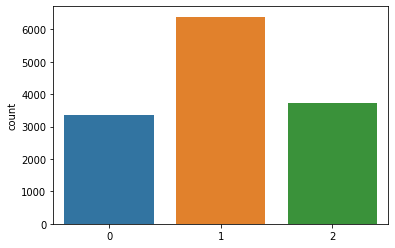

In [ ]:
sns.countplot(labels_train)

Since, the number of observations are not same in each class, data augmentation can be done.

Fitting the model with Xgboost Classifier:

In [ ]:
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(train, labels_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
accuracy_score(labels_train, xgb_cl.predict(train))

0.5828571428571429

In [ ]:
accuracy_score(labels_val, xgb_cl.predict(val))

0.5811175337186898

Predicting the labels for test values.

In [ ]:
preds = xgb_cl.predict(test)

In [ ]:
#xgb_cl = xgb.XGBClassifier(objective = 'multi:softprob', booster='dart', n_jobs = -1)
#xgb_cl.fit(train, labels_train)

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#accuracy_score(labels_val, xgb_cl.predict(val))
#0.5876685934489403

0.5876685934489403

In [ ]:
#accuracy_score(labels_train, xgb_cl.predict(train))
#0.5821892393320964

0.5821892393320964

Fitting the model with Support Vector Classifier:

In [ ]:
#svc = SVC()
#svc.fit(train, labels_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#accuracy_score(labels_train, svc.predict(train))
#0.7902040816326531

0.7902040816326531

In [ ]:
#accuracy_score(labels_val, svc.predict(val))
#0.5961464354527939

0.5961464354527939

Fitting the model with Decision Tree Classifier:

In [ ]:
#dtc = DecisionTreeClassifier()
#dtc.fit(train, labels_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#accuracy_score(labels_train, dtc.predict(train))
#0.9914656771799629

0.9914656771799629

In [ ]:
#accuracy_score(labels_val, dtc.predict(val))
#0.4273603082851638

0.4273603082851638

Fitting the model with Gradient Boosting Classifier:

In [ ]:
#gbc = GradientBoostingClassifier()
#gbc.fit(train, labels_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
#accuracy_score(labels_train, gbc.predict(train))
#0.6106122448979592

0.6106122448979592

In [ ]:
#accuracy_score(labels_val, gbc.predict(val))
#0.5791907514450867

0.5791907514450867

Implementation of HOG transformation on the dataset using the source code from [link text](https://kapernikov.com/tutorial-image-classification-with-scikit-learn/)


In [ ]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
import skimage
 
# create an instance of each transformer
hogify = HogTransformer(
    pixels_per_cell=(32, 32), 
    cells_per_block=(3,3), 
    orientations=9, 
    block_norm='L2-Hys'
)
scalify = StandardScaler()
 
# call fit_transform on each transform converting X_train step by step

X_train_hog = hogify.fit_transform(images_train)
X_train_prepared = scalify.fit_transform(X_train_hog)

Fitting the model on HOG transformed data using Stocastic Gradient Descent Classifier:

In [ ]:
X_train_prepared = pd.DataFrame(X_train_prepared)

In [ ]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train_prepared, labels_train)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_pred = sgd_clf.predict(hogify.transform(images_val))

In [ ]:
accuracy_score(labels_val, y_pred)

0.5699421965317919

In [ ]:
accuracy_score(labels_train,sgd_clf.predict(hogify.transform(images_train)))

0.4742857142857143

# Findings of Conventional Machine Learning:

* The conventioanl model which were used are XGBoost Classifier, Support Vector Machine, Decision Tree Classifier, Gradient Boost  Classifier and Stochastic Gradient Descent with HOG Features

* All the models were not submitted to the public competition.

* XGBoost Classifier and SGD classifier were submitted to public competition. The accuracy for XGBoost on train was 0.582, on val was 0.587 and test set was 0.486, which shows the model performed decently.

* HOG with SGD classifier accuracy on train was 0.4782, validation was 0.5694 and test was 0.4896, which shows using HOG features did not improve the model as it was found that the model got same accuracy without HOG features.

* The performance of other model which were not submitted to kaggle are  as follows 

     * The accuracy for SVC on train was 0.7902 and val was 0.596
     * The accuracy for DTC on train was 0.9914 and val was 0.47, which shows model is overfitting on the training data.
     * The accuracy for GBC on train was 0.610 and val was 0.579

* The best model using conventional machine learning was XGBoost Classifier.

* The accuracy of the model can be improved by tuning the hyperparameters using RandomSearchCV or GridSearchCV, which was not done to high amount of data and limited computational resources.

# Deep Learning:

Importing all the necessary libraries:

In [ ]:
import keras
from keras.models import Sequential
from keras import Model, layers
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , InputLayer, BatchNormalization, GlobalMaxPooling2D, GlobalAveragePooling2D, MaxPooling2D,MaxPooling3D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras import layers
from keras.utils import np_utils
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.callbacks import ReduceLROnPlateau

Using categorical_crossentropy as loss function, optimiser as adam as it converges faster and  produces high quality results.
Accuracy was chosen as metrics.

Converting lables from n x 1 array to n x 3 array using np.utils

In [ ]:
n_classes = 3
Y_train = np_utils.to_categorical(labels_train, n_classes)
Y_val = np_utils.to_categorical(labels_val, n_classes)

Deep Nueral Network:

In [ ]:
model = keras.models.Sequential()
model.add(layers.Flatten(input_shape = [100,100,3], name = 'input'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(800, activation = 'relu', kernel_initializer = "he_normal"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(100, activation = 'relu', kernel_initializer = "he_normal"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(3, activation = 'softmax', name = 'output'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Flatten)              (None, 30000)             0         
_________________________________________________________________
batch_normalization (BatchNo (None, 30000)             120000    
_________________________________________________________________
dense (Dense)                (None, 800)               24000800  
_________________________________________________________________
dropout (Dropout)            (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               80100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
output (Dense)               (None, 3)                 3

* In Sequential model, flatten layer was addedto reduce the 3 D array to 1D array
*  Batch Normalization was used to normalize the data
* Three dense layers were used with final output layer has 3 nodes.
* Two dropout layers were used.

In [ ]:
model.compile(loss = "categorical_crossentropy", optimizer = 'Adam', metrics = ['Accuracy'])

In [ ]:
history = model.fit(
    images_train, Y_train,
    validation_data = (images_val,Y_val),
     epochs=10)

Epoch 1/10
422/422 [==============================] - 11s 19ms/step - loss: 2.8862 - Accuracy: 0.4603 - val_loss: 1.0406 - val_Accuracy: 0.5630
Epoch 2/10
422/422 [==============================] - 7s 17ms/step - loss: 1.0473 - Accuracy: 0.4905 - val_loss: 0.9885 - val_Accuracy: 0.5769
Epoch 3/10
422/422 [==============================] - 7s 17ms/step - loss: 1.0423 - Accuracy: 0.4937 - val_loss: 0.9846 - val_Accuracy: 0.5761
Epoch 4/10
422/422 [==============================] - 7s 17ms/step - loss: 1.0179 - Accuracy: 0.5052 - val_loss: 0.9628 - val_Accuracy: 0.5765
Epoch 5/10
422/422 [==============================] - 7s 17ms/step - loss: 1.0145 - Accuracy: 0.5086 - val_loss: 0.9555 - val_Accuracy: 0.5796
Epoch 6/10
422/422 [==============================] - 7s 17ms/step - loss: 1.0098 - Accuracy: 0.5128 - val_loss: 0.9447 - val_Accuracy: 0.5823
Epoch 7/10
422/422 [==============================] - 7s 17ms/step - loss: 1.0101 - Accuracy: 0.5151 - val_loss: 0.9651 - val_Accuracy: 0.578

Using argmax to select the class with maximum probability.

In [ ]:
pred = model.predict(images_val)
pred = np.argmax(pred, axis = -1)
pred

array([1, 0, 1, ..., 1, 1, 1])

Convolutional Nueral Network: 
CNN was used to predict the classes with  source code from [[2]](https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/)

In [ ]:
# build a sequential model
model = Sequential()
model.add(InputLayer(input_shape=(100, 100, 3)))

# 1st conv block
model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
# 2nd conv block
model.add(Conv2D(50, (5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())
# 3rd conv block
model.add(Conv2D(70, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(100, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
model.add(BatchNormalization())
# ANN block
model.add(Flatten())
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.25))
# output layer
model.add(Dense(units=3, activation='softmax'))

# compile model
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
# fit on data for 30 epochs
model.fit(images_train, Y_train,
    validation_data = (images_val,Y_val),
     epochs=10)

Epoch 1/10
422/422 [==============================] - 38s 23ms/step - loss: 1.0402 - accuracy: 0.4770 - val_loss: 0.9767 - val_accuracy: 0.5522
Epoch 2/10
422/422 [==============================] - 9s 21ms/step - loss: 0.9890 - accuracy: 0.5118 - val_loss: 0.9618 - val_accuracy: 0.5588
Epoch 3/10
422/422 [==============================] - 9s 21ms/step - loss: 0.9652 - accuracy: 0.5235 - val_loss: 0.9799 - val_accuracy: 0.5526
Epoch 4/10
422/422 [==============================] - 9s 22ms/step - loss: 0.9347 - accuracy: 0.5443 - val_loss: 0.9159 - val_accuracy: 0.5911
Epoch 5/10
422/422 [==============================] - 9s 22ms/step - loss: 0.9062 - accuracy: 0.5573 - val_loss: 0.9329 - val_accuracy: 0.5514
Epoch 6/10
422/422 [==============================] - 9s 21ms/step - loss: 0.8765 - accuracy: 0.5799 - val_loss: 1.0342 - val_accuracy: 0.5091
Epoch 7/10
422/422 [==============================] - 9s 21ms/step - loss: 0.8372 - accuracy: 0.6016 - val_loss: 1.1389 - val_accuracy: 0.454

* Three Conv2D layers was used with relu activation function, with maxpool2D and Batch Normalization after each conv2D layer.
* Flatten layer was addedto reduce the 3 D array to 1D array 
* Three dense layers were used with final output layer has 3 nodes.
* One dropout layers was used.

In [ ]:
pred = model.predict(images_val)
pred = np.argmax(pred, axis = -1)
pred

array([0, 1, 1, ..., 1, 0, 0])

Transfer Learning using ResNET-50


In [ ]:

ResNet50_model = ResNet50(weights='imagenet', include_top=False, input_shape=(100,100,3), classes=6)

for layers in ResNet50_model.layers:
    layers.trainable=True

opt = SGD(lr=0.01,momentum=0.7)
resnet50_1 = Flatten()(ResNet50_model.output)
resnet50_1 = Dense(256,activation='relu')(resnet50_1)
resnet50_1 = Dense(3,activation='softmax')(resnet50_1)
resnet50_1_final_model = Model(inputs=ResNet50_model.input, outputs=resnet50_1)
resnet50_1_final_model.compile(loss = 'categorical_crossentropy', optimizer= opt, metrics=['acc'])

number_of_epochs = 10
resnet_filepath = 'resnet50_1'+'-saved-model-{epoch:02d}-val_acc-{val_acc:.2f}.hdf5'
resnet_1_checkpoint = tf.keras.callbacks.ModelCheckpoint(resnet_filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
resnet_1_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
reduce_1_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.05, patience=5, min_lr=0.000002)
callbacklist = [resnet_1_checkpoint,resnet_1_early_stopping,reduce_1_lr]
resnet50_1_history = resnet50_1_final_model.fit(images_train, Y_train,
    validation_data = (images_val,Y_val), epochs = number_of_epochs,callbacks=callbacklist,verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
422/422 [==============================] - 146s 258ms/step - loss: 0.9567 - acc: 0.5511 - val_loss: 1.0230 - val_acc: 0.5672

Epoch 00001: val_acc improved from -inf to 0.56724, saving model to resnet50_1-saved-model-01-val_acc-0.57.hdf5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
422/422 [==============================] - 105s 250ms/step - loss: 0.7135 - acc: 0.6852 - val_loss: 0.8959 - val_acc: 0.5988

Epoch 00002: val_acc improved from 0.56724 to 0.59884, saving model to resnet50_1-saved-model-02-val_acc-0.60.hdf5
Epoch 3/10
422/422 [==============================] - 105s 249ms/step - loss: 0.5383 - acc: 0.7741 - val_loss: 1.0150 - val_acc: 0.5919

Epoch 00003: val_acc did not improve from 0.59884
Epoch 4/10
422/422 [==============================] - 105s 248ms/step - loss: 0.4101 - acc: 0.8329 - val_loss: 1.0433 - val_acc: 0.5800

Epoch 00004: val_acc did not improve from 0.59884
Epoch 5/10
422/422 [==============================] - 110s 260ms/step - loss: 0.2755 - acc: 0.8973 - val_loss: 1.9882 - val_acc: 0.4859

Epoch 00005: val_acc did not improve from 0.59884
Epoch 6/10
422/422 [==============================] - 105s 248ms/step - loss: 0.2144 - acc: 0.9194 - val_loss: 1.6142 - val_acc: 0.5680

Epoch 00006: val_acc did not improve from 0.59884


Transfer learning was done using ResNET50 with two dense layers at that end of the ResNET architecture with final layer being the output with 3 nodes. ReduceLROnPlateau was used to decrease the learning rate based on loss. Early stopping was used to stop the model if the model does not improve after five consecutive echos.

In [ ]:
pred = resnet50_1_final_model.predict(images_val)

In [ ]:
pred =  pd.DataFrame(pred)


,0
0,0
1,1
2,0
3,1
4,0
...,...
2590,0
2591,0
2592,1
2593,1


Inorder to improve the ResNET-50 model, adding one more dense layer 

In [ ]:

ResNet50_model = ResNet50(weights='imagenet', include_top=False, input_shape=(100,100,3), classes=6)

for layers in ResNet50_model.layers:
    layers.trainable=True

opt = SGD(lr=0.01,momentum=0.7)
resnet50_2 = Flatten()(ResNet50_model.output)
resnet50_2 = Dense(256,activation='relu')(resnet50_2)
resnet50_2 = Dense(128,activation='relu')(resnet50_2)
resnet50_2 = Dense(3,activation='softmax')(resnet50_2)
resnet50_2_final_model = Model(inputs=ResNet50_model.input, outputs=resnet50_2)
resnet50_2_final_model.compile(loss = 'categorical_crossentropy', optimizer= opt, metrics=['acc'])

number_of_epochs = 10
resnet_filepath = 'resnet50'+'-saved-model-{epoch:02d}-val_acc-{val_acc:.2f}.hdf5'
resnet_2_checkpoint = tf.keras.callbacks.ModelCheckpoint(resnet_filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
resnet_2_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
reduce_2_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.05, patience=5, min_lr=0.000002)
callbacklist = [resnet_2_checkpoint,resnet_2_early_stopping,reduce_2_lr]
resnet50_2_history = resnet50_2_final_model.fit(images_train, Y_train,
    validation_data = (images_val,Y_val), epochs = number_of_epochs,callbacks=callbacklist,verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
422/422 [==============================] - 115s 258ms/step - loss: 0.8670 - acc: 0.5958 - val_loss: 1.0850 - val_acc: 0.3268

Epoch 00001: val_acc improved from -inf to 0.32678, saving model to resnet50-saved-model-01-val_acc-0.33.hdf5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
422/422 [==============================] - 105s 249ms/step - loss: 0.6381 - acc: 0.7223 - val_loss: 1.8554 - val_acc: 0.3653

Epoch 00002: val_acc improved from 0.32678 to 0.36532, saving model to resnet50-saved-model-02-val_acc-0.37.hdf5
Epoch 3/10
422/422 [==============================] - 105s 249ms/step - loss: 0.4584 - acc: 0.8112 - val_loss: 0.8636 - val_acc: 0.6586

Epoch 00003: val_acc improved from 0.36532 to 0.65857, saving model to resnet50-saved-model-03-val_acc-0.66.hdf5
Epoch 4/10
422/422 [==============================] - 105s 248ms/step - loss: 0.3366 - acc: 0.8706 - val_loss: 1.1495 - val_acc: 0.6058

Epoch 00004: val_acc did not improve from 0.65857
Epoch 5/10
422/422 [==============================] - 105s 249ms/step - loss: 0.2504 - acc: 0.9093 - val_loss: 3.0620 - val_acc: 0.3118

Epoch 00005: val_acc did not improve from 0.65857
Epoch 6/10
422/422 [==============================] - 105s 249ms/step - loss: 0.2202 - acc: 0.9175 - val_loss: 2.1511 - val_ac

In [ ]:
pred1 = resnet50_x_final_model.predict(images_test_public)
pred1 = np.argmax(pred1, axis = 1)
pred1 =  pd.DataFrame(pred1)

In [ ]:
accuracy_score(labels_val, pred)

In [ ]:
pred = resnet50_x_final_model.predict(images_test_priv)
pred = np.argmax(pred, axis = 1)
pred =  pd.DataFrame(pred)

# Findings of Deep Learning:
* Deep Neural Network, Convolutional Neural Network, Transfer Learning with 2 and  dense Layers are used.
* Deep Neural Network got an accuracy of 0.5196 on train, 0.5954 on val and 0.4680 on public test data
* Convolutional Neural Network got an accuracy of 0.6844 on train and 0.5499. This model is expected to perform better than the previous model, but the accuracy on val set was less than that of deep learning model. One of the reasons might be less  number of layers to fit the number of variables. The accuracy of this model can be improved by tuning the parameters with a builtin keras library called keras tuner.
* Transfer Learning using ResNET-50 (ResNET_50_1) with two dense layers has a significant improvement in performance with accuracy of 0.9398 on train, 0.6767 on val and 0.68534 on public test set.
* In order to get better accuracy, another dense layer (ResNET_50_2) was added to the previous model, which increased the accuracy to 0.9744 on train, 0.6713 on val and 0.708 on public test set.
* The performance of ResNET model can be improved by adding more dense layers at the end of the network.


# Performance of private test set: 

Deep Learning models ResNET_50_1 and ResNET_50_2 were submitted to private competition of which ResNET_50_1 got an accuracy of 0.718 and ResNET_50_2 got an accuracy of 0.72148 with 11 position on Leaderboard.

# Comparison of accuracies on Conventional and Deep Learning models:
Traditionally deep learning models perform better than conventional machine learning models. But simple DNN performance was similar to that of the conventional machine learning model, which might be because of less Dense Layers in the model

# Comparison of accuracies on Public test and Private test:
The performance of ResNET_50_1 and ResNET_50_2 on public and Private test set were almost similar. There aren't any considerable differences in performance on public and private datasets.
